### Finance Libraries

#### Assignment 1.

yfinance로부터 SOXL의 가격 데이터를 불러와 매매 전략을 만들려고 합니다. 단, 데이터는 2020년부터 2024년 2월 29일까지로 합니다.

In [1]:
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

start_date = '2020-01-01'
end_date = '2024-03-01'

soxl = yf.download('SOXL', start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


**Assignment 1-1**

SOXL의 5일 이동평균선과 21일 이동평균선을 생성합니다. 짧은 기간의 이동평균선이 긴 기간의 이동평균선을 상향 돌파할 때 매수, 하향 돌파할 때 매도로 간주합니다. label은 1은 매수, -1은 매도로 합니다. 매수 신호가 나올 때에만 투자한다고 가정할 때, 전략의 성과를 평가하세요.

(단, 종가를 이용한다면 실제로 의사결정을 다음날 시행하므로 label은 하루씩 뒤로 밀어서 써야 합니다.)

In [2]:
short_window = 5
long_window = 21
soxl['SMA'] = soxl['Close'].rolling(window = short_window).mean()
soxl['LMA'] = soxl['Close'].rolling(window = long_window).mean()

In [3]:
soxl['return'] = soxl['Close'].pct_change()

In [4]:
import numpy as np

soxl['Signal'] = 0  # 초기값 설정
soxl['Signal'][short_window:] = np.where(soxl['SMA'][short_window:] > soxl['LMA'][short_window:], 1, -1)
soxl['Position'] = soxl['Signal'].shift(1)

In [5]:
strategy1 = soxl[soxl.Position == 1]['return']

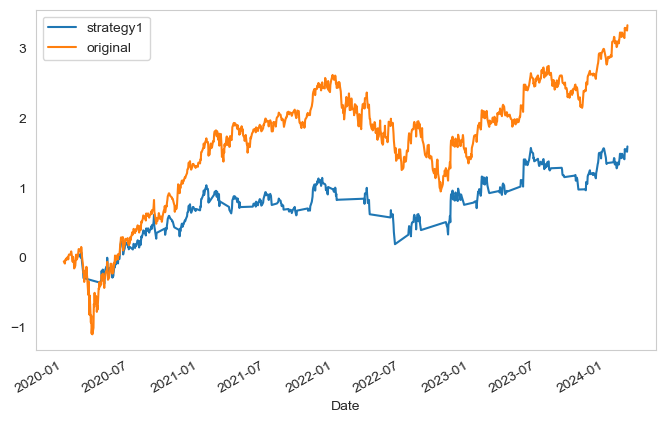

In [6]:
import matplotlib.pyplot as plt
strategy1.cumsum().plot(
    grid = False,
    figsize = (8, 5),
    label = 'strategy1'
)
soxl['Close'].pct_change().cumsum().plot(
    grid = False,
    label = 'original'
)
plt.legend()
plt.show()

**Assignment 1-2**

포지션이 매도인 경우 SOXL에 매도 포지션을 취하고 매수인 경우 SOXL에 매수 포지션을 취하는 전략을 구상하세요. 매도 포지션은 단순화를 위해 기존 수익률에 -1을 곱하는 것으로 가정합니다.

In [7]:
-soxl[soxl.Position == -1]['return']

Date
2020-01-10    0.020439
2020-01-13   -0.039202
2020-01-14   -0.006441
2020-01-15    0.036052
2020-01-16   -0.050115
                ...   
2024-01-12    0.012649
2024-01-16   -0.038790
2024-01-17    0.026036
2024-01-18   -0.097081
2024-01-19   -0.117666
Name: return, Length: 465, dtype: float64

In [8]:
import pandas as pd

strategy2 = pd.concat(
    [strategy1, -soxl[soxl.Position == -1]['return']] ,
    axis = 0
)

In [9]:
strategy2.sort_index(inplace = True)

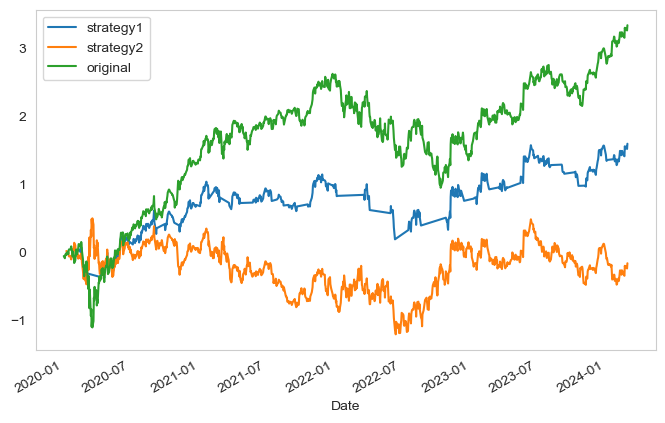

In [10]:
strategy1.cumsum().plot(
    grid = False,
    figsize = (8, 5),
    label = 'strategy1'
)
strategy2.cumsum().plot(
    grid = False,
    figsize = (8, 5),
    label = 'strategy2'
)
soxl['Close'].pct_change().cumsum().plot(
    grid = False,
    label = 'original'
)
plt.legend()
plt.show()

**Assignment 1-3**

quantstats 라이브러리를 이용해 전략의 성과를 평가하세요. 위 전략은 성공적인가요? 기간별로 나눈다면, 시기마다 전략은 달라져야 할까요?

#### Assignment 2

투자자 A와 투자자 B는 2022년 시작 전에 다음과 같은 견해를 가졌습니다.

- 투자자 A : COVID-19가 곧 종식될것 같으니, 소비심리가 회복되어 증권가격이 상승할 것 같아. 위험자산의 비중을 70%, 채권을 30%로 가져가야겠어.
- 투자자 B : COVID-19가 곧 종식될것 같으니, 긴축재정의 영향으로 증권가격이 하락할 것 같아. 위험자산의 비중을 30%, 채권을 70%로 가져가야겠어.

투자기간이 2022년부터 2023년 12월까지라고 가정할 때, 두 투자자의 배분 전략의 성과를 평가하세요. 단, 문제의 단순화를 위해 위험자산은 S&P500 인덱스로 가정하고, 채권은 미국채 5년 수익률을 사용합니다.

tickers = ['AAPL','^FVX']

In [11]:
import yfinance as yf
start_date = '2022-01-01'
end_date = '2024-01-01'

tickers = ['AAPL','^FVX']
markets = pd.DataFrame()

for i in tickers :
    markets = pd.concat(
        [markets, yf.download(i, start_date, end_date)['Close']],
        axis = 1 # 오른쪽으로 붙인다
    )
markets.columns = tickers

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [14]:
ret = markets.pct_change(fill_method = 'pad').fillna(0)

In [19]:
portfolio_a = (ret * [0.7, 0.3]).sum(axis = 1)

In [21]:
portfolio_b = (ret * [0.3, 0.7]).sum(axis = 1)

**2.1** quantstats를 통해 두 포트폴리오의 성과를 비교하세요. 배분전략에서 거시경제적 환경을 바라보는 투자자의 관점은 중요할까요?